## DATA Ingestion 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_main = pd.read_csv('data/gemstone.csv')

In [3]:
df = df_main.sample(n=int((0.4 * len(df_main))))

In [4]:
df.isnull().sum()

Unnamed: 0    0
id            0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77429 entries, 99177 to 69773
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  77429 non-null  int64  
 1   id          77429 non-null  int64  
 2   carat       77429 non-null  float64
 3   cut         77429 non-null  object 
 4   color       77429 non-null  object 
 5   clarity     77429 non-null  object 
 6   depth       77429 non-null  float64
 7   table       77429 non-null  float64
 8   x           77429 non-null  float64
 9   y           77429 non-null  float64
 10  z           77429 non-null  float64
 11  price       77429 non-null  int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 7.7+ MB


In [6]:
df.drop(labels=['id'], axis=1, inplace=True)

In [7]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
99177,99177,1.04,Premium,F,VVS2,62.3,58.0,6.48,6.43,4.02,9341
103750,103750,0.30,Ideal,G,VVS1,62.5,54.0,4.30,4.34,2.70,764
34990,34990,1.11,Ideal,H,SI1,62.0,57.0,6.68,6.64,4.13,5646
30827,30827,0.43,Ideal,H,IF,61.9,55.0,4.85,4.84,3.00,1175
146557,146557,1.06,Premium,G,VS2,60.2,55.0,6.68,6.66,4.01,7334


In [8]:
df.drop(labels=['Unnamed: 0'], axis=1, inplace=True)

In [9]:
df.duplicated().sum()

0

### segregating numeric and catagorical columns

In [10]:
cat_cols = df.columns[df.dtypes == 'object']
num_cols = df.columns[df.dtypes != 'object']

In [11]:
num_cols, cat_cols

(Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object'),
 Index(['cut', 'color', 'clarity'], dtype='object'))

In [12]:
df[cat_cols].describe()

,cut,color,clarity
count,77429,77429,77429
unique,5,7,8
top,Ideal,G,SI1
freq,36990,17832,21310


In [13]:
df['cut'].value_counts()

cut
Ideal        36990
Premium      20013
Very Good    14973
Good          4668
Fair           785
Name: count, dtype: int64

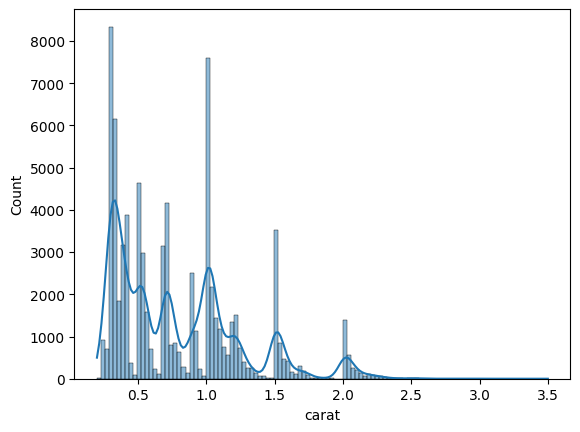

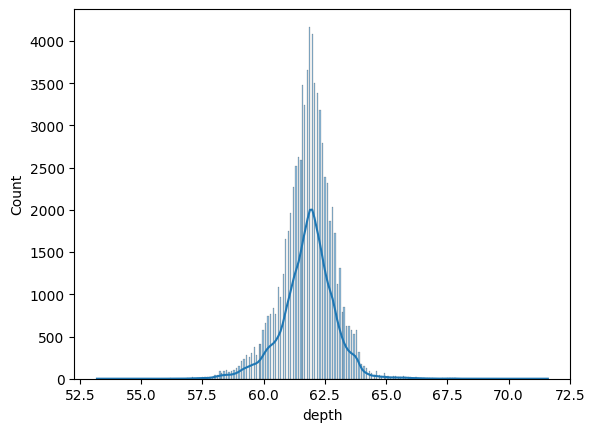

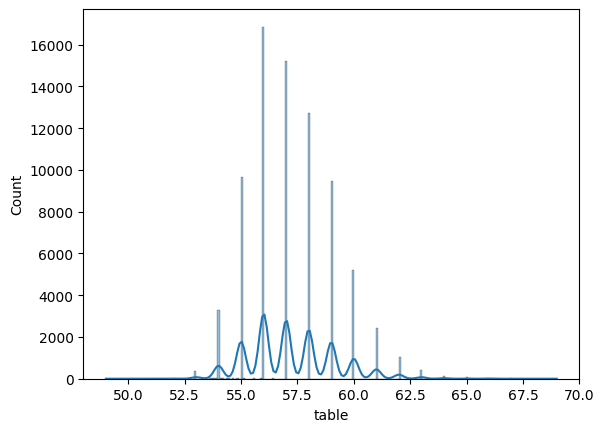

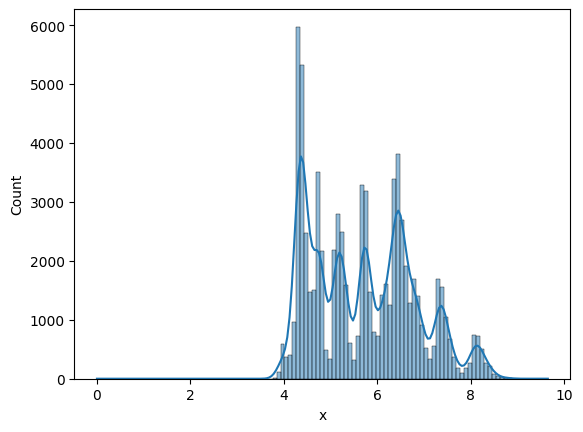

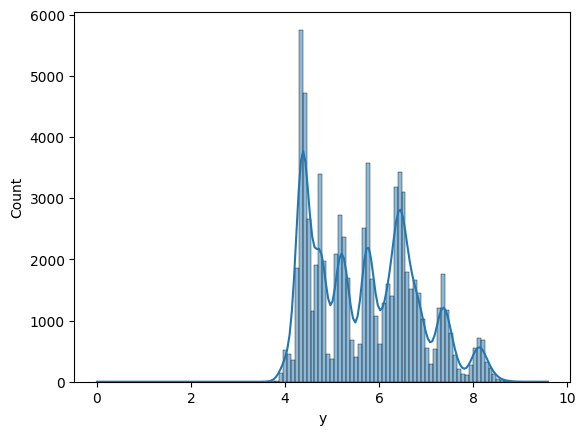

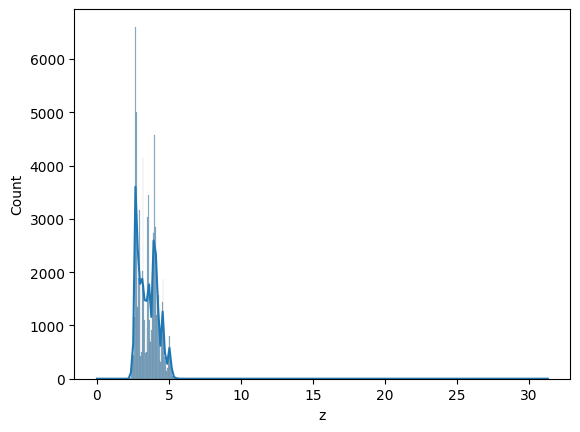

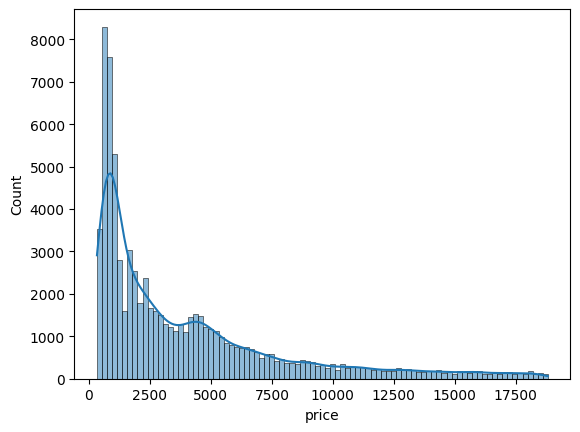

In [14]:
for col in num_cols:
    sns.histplot(data=df[col],kde=True)
    plt.show()


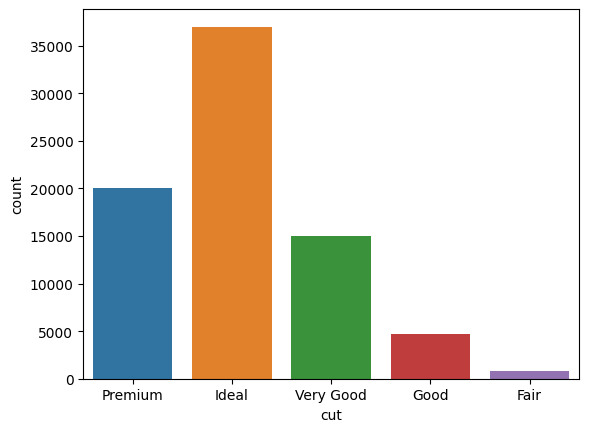

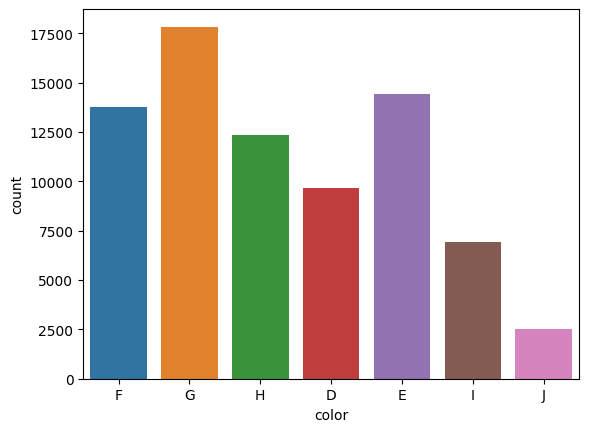

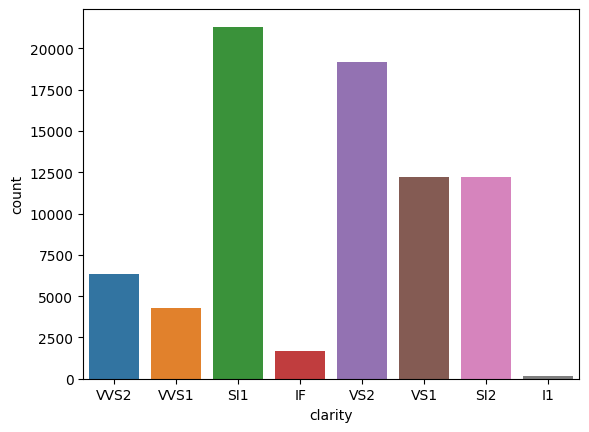

In [15]:
for col in cat_cols:
    sns.countplot(x=df[col])
    plt.show()

<Axes: >

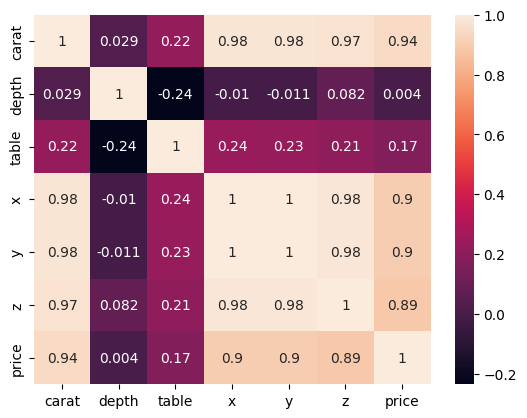

In [16]:
sns.heatmap(df[num_cols].corr(), annot=True)

In [17]:
#df = df.drop(labels=['x', 'y', 'z'], axis=1)

In [23]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
99177,1.04,Premium,F,VVS2,62.3,58.0,6.48,6.43,4.02,9341
103750,0.30,Ideal,G,VVS1,62.5,54.0,4.30,4.34,2.70,764
34990,1.11,Ideal,H,SI1,62.0,57.0,6.68,6.64,4.13,5646
30827,0.43,Ideal,H,IF,61.9,55.0,4.85,4.84,3.00,1175
146557,1.06,Premium,G,VS2,60.2,55.0,6.68,6.66,4.01,7334


In [19]:
    df['cut'].unique()

array(['Premium', 'Ideal', 'Very Good', 'Good', 'Fair'], dtype=object)

In [20]:
cut_map = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Premium' : 4, 'Ideal' : 5}

In [21]:
df['clarity'].unique()

array(['VVS2', 'VVS1', 'SI1', 'IF', 'VS2', 'VS1', 'SI2', 'I1'],
      dtype=object)

In [22]:
clarity_map = {'I1' : 1, 'SI2' : 2, 'SI1' : 3, 'VS2' : 4, 'VS1' : 5, 'VVS2' : 6, 'VVS1' : 7, 'IF' : 8}

In [24]:
df['color'].unique()

array(['F', 'G', 'H', 'D', 'E', 'I', 'J'], dtype=object)

In [25]:
color_map = {'D' : 1, 'E' : 2, 'F' : 3, 'G' : 4, 'H' : 5, 'I' : 6, 'J' : 7}

In [30]:
df['cut'] = df['cut'].replace(cut_map)

In [31]:
df['clarity'] = df['clarity'].replace(clarity_map)

In [32]:
df['color'] = df['color'].map(color_map)

In [33]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
99177,1.04,4,3,6,62.3,58.0,6.48,6.43,4.02,9341
103750,0.30,5,4,7,62.5,54.0,4.30,4.34,2.70,764
34990,1.11,5,5,3,62.0,57.0,6.68,6.64,4.13,5646
30827,0.43,5,5,8,61.9,55.0,4.85,4.84,3.00,1175
146557,1.06,4,4,4,60.2,55.0,6.68,6.66,4.01,7334
